https://www.kaggle.com/datasets/harshsingh2209/medical-insurance-payout
https://medium.com/the-artificial-impostor/quantile-regression-part-1-e25bdd8d9d43

In [2]:
%pip install seaborn tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Exploratory Data Analysis (EDA):

- Study the relationship between the features and the target variable (charges).
- Analyze the distribution of the target variable by itself.
- Generate relevant plots to visualize these relationships.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set the random seed for reproducibility
np.random.seed(13)

In [5]:
df = pd.read_csv('expenses.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Distribution Plot: Visualizes the distribution of the charges variable to understand its spread and skewness.

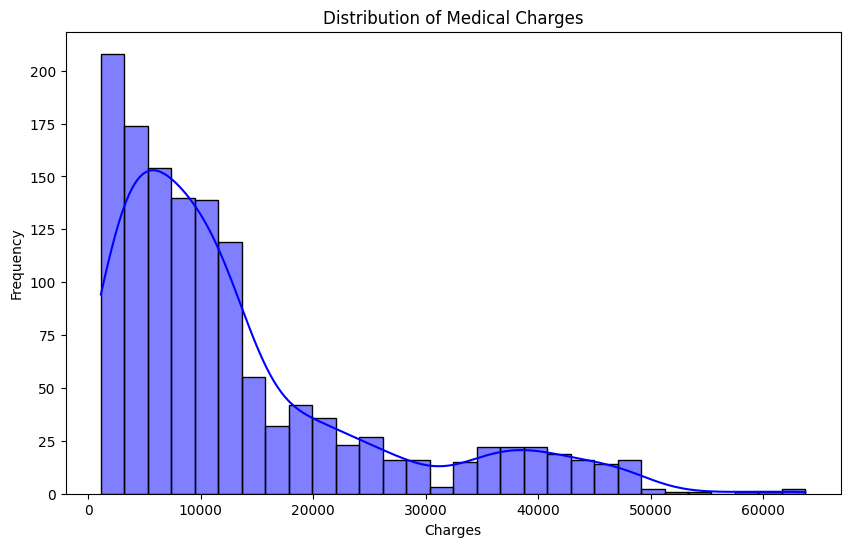

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

### Box Plots: Examine the impact of categorical variables (smoker, sex, region, children) on the target variable.

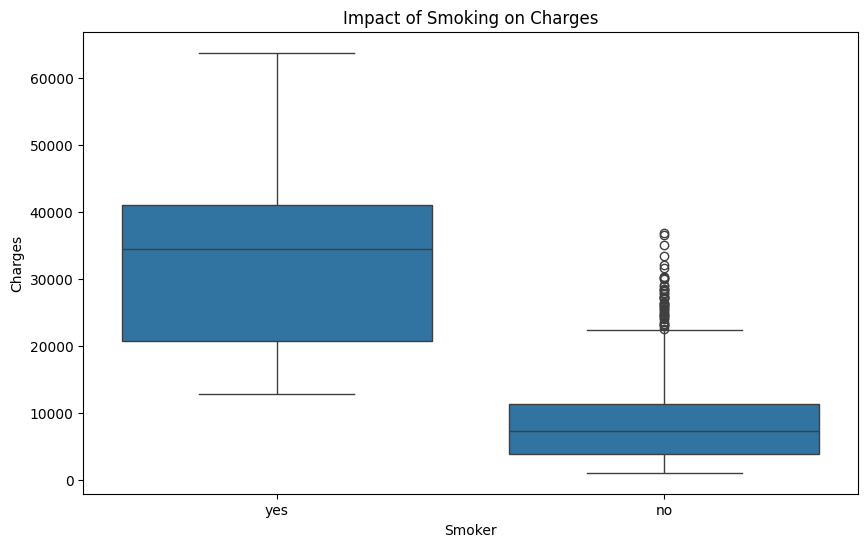

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Impact of Smoking on Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

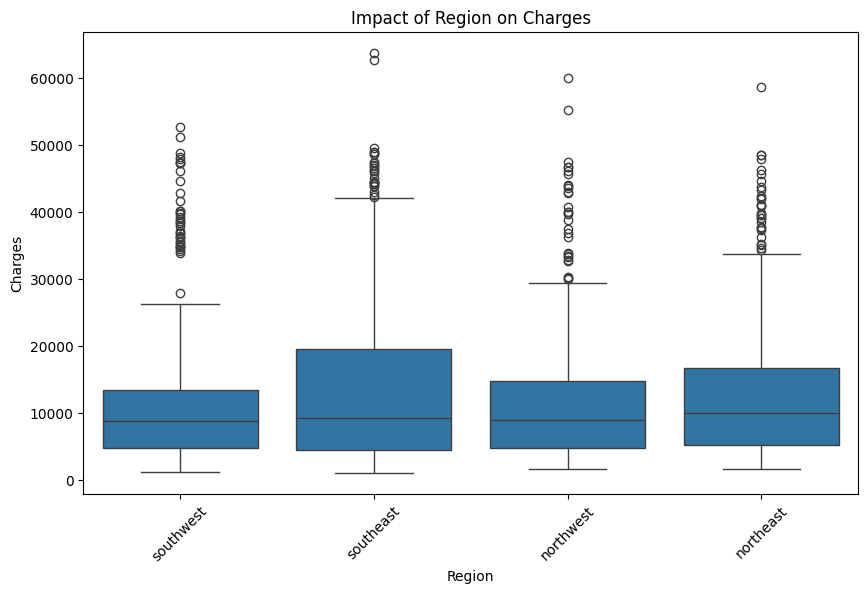

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Impact of Region on Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.xticks(rotation=45)
plt.show()


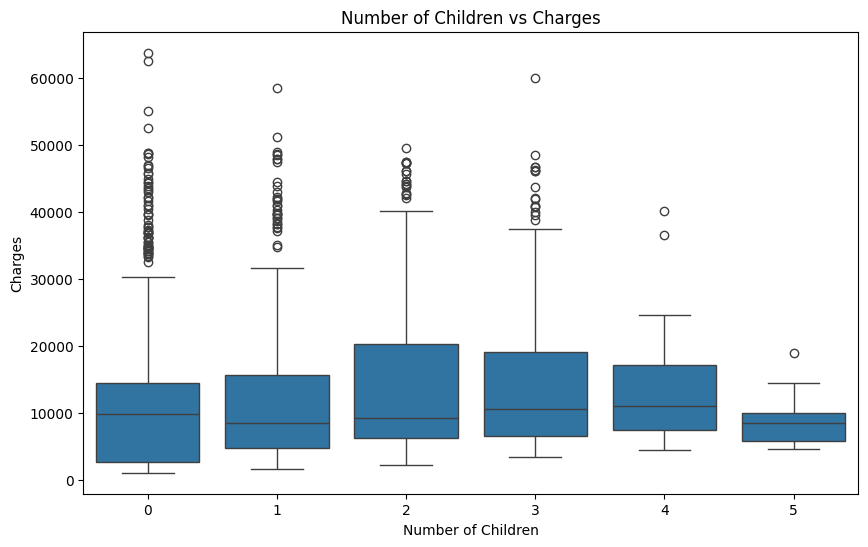

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Number of Children vs Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

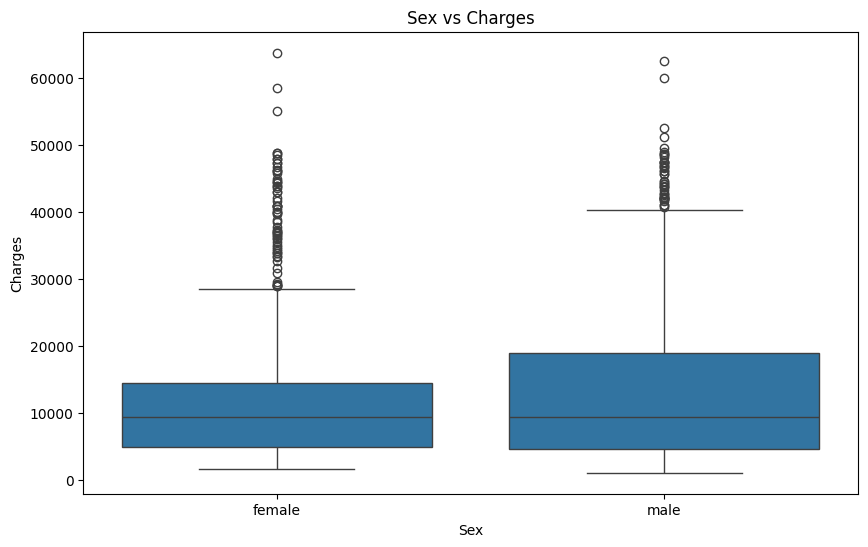

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

### Scatter Plots: Analyze the relationships between continuous variables (age, bmi) and charges, color-coded by the smoker status to see any potential interactions.

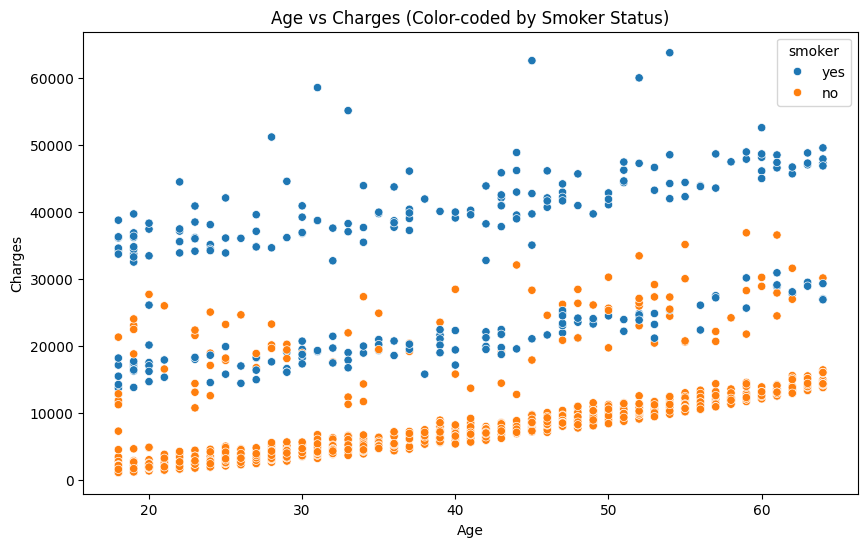

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.title('Age vs Charges (Color-coded by Smoker Status)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

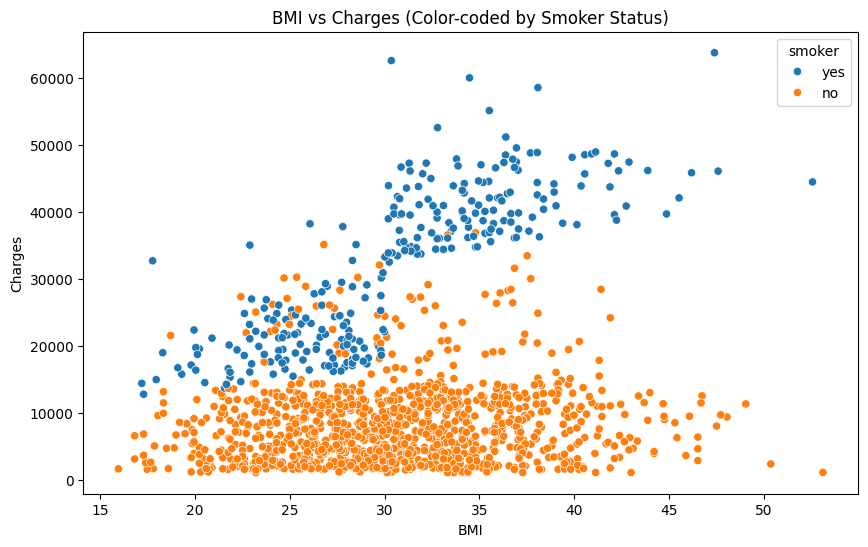

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('BMI vs Charges (Color-coded by Smoker Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

## Data Preprocessing:

- Handle categorical variables (sex, smoker, region).
- Normalize or standardize the continuous variables (age, bmi, children).
- Handle any missing data if present (though none was mentioned).
- Split the dataset into training and testing sets.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### Categorical Features & Numeric Features
- Categorical Features: Handled using One-Hot Encoding to convert categorical variables into numerical format.
- Numeric Features: Imputation is used to fill in any missing values (if any), followed by standardization.
- Preprocessor Pipeline: Combines the transformations into a streamlined pipeline to ensure consistent preprocessing during model training and evaluation.

In [16]:
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))  # avoid dummy variable trap
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Train/Test Split: The dataset is split into training and testing sets, which is crucial for evaluating model performance.

In [17]:
# Define target and features
X = df.drop('charges', axis=1)
y = df['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data using the preprocessor
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [18]:
print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


In [595]:
# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
%pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Quantile Linear Regression

In [20]:
import statsmodels.api as sm
from sklearn.metrics import mean_pinball_loss

In [21]:
def quantile_regression(X_train, y_train, X_test, quantiles):
    predictions = pd.DataFrame()

    for q in quantiles:
        # Fit the model for the q-th quantile
        model = sm.QuantReg(y_train, sm.add_constant(X_train))
        res = model.fit(q=q)

        # Predict on the test set
        predictions[f'quantile_{int(q*100)}'] = res.predict(sm.add_constant(X_test))

    return predictions

# Define 100 quantiles from 0.01 to 0.99
quantiles = np.linspace(0.01, 0.99, 99)

# Get predictions for each quantile
qr_predictions = quantile_regression(X_train, y_train, X_test, quantiles)


c:\Users\plodato\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\plodato\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\plodato\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\plodato\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximu

In [22]:
qr_predictions.head()

,quantile_1,quantile_2,quantile_3,quantile_4,quantile_5,quantile_6,quantile_8,quantile_9,quantile_10,quantile_11,...,quantile_90,quantile_91,quantile_92,quantile_93,quantile_94,quantile_95,quantile_96,quantile_97,quantile_98,quantile_99
0,9044.332283,9044.233537,9022.733632,8989.966235,8999.299572,8992.705538,9000.433249,8995.722920,8989.991924,8981.735095,...,12844.091115,14457.612859,16603.832899,17488.672332,20467.776784,23307.495383,25309.646390,27912.000330,29707.605901,30132.962527
1,5178.468691,5182.555289,5208.793022,5245.478604,5226.214283,5241.736590,5247.535995,5260.397072,5276.746800,5276.672230,...,11101.974566,13608.525619,18568.216159,19711.930718,21929.547869,22903.635332,24349.747337,25123.454817,25548.701128,24984.337932
2,23917.621580,24005.065453,24154.287301,24135.261472,24900.236449,25413.792535,25609.339749,25883.497622,25987.511755,26097.824889,...,44382.970110,44316.350208,49098.267913,49923.870915,50298.392022,53333.590200,53554.532733,56908.685590,61142.221011,60414.560432
3,9222.368283,9224.571666,9198.539700,9154.579941,9185.444051,9165.822027,9166.266089,9165.392715,9149.355796,9134.144246,...,12802.274839,14528.717879,19028.213164,21070.583673,21338.880058,24414.611804,25521.892106,28231.578832,30620.053750,31398.816386
4,10946.844981,11055.347308,11429.198504,11726.585667,12222.154969,12819.480027,12988.121111,13311.952320,13473.951652,13692.803431,...,34185.947231,34286.452154,38283.196294,38977.915871,37785.467230,39518.132423,40610.718161,43221.468377,48251.082198,51813.352572


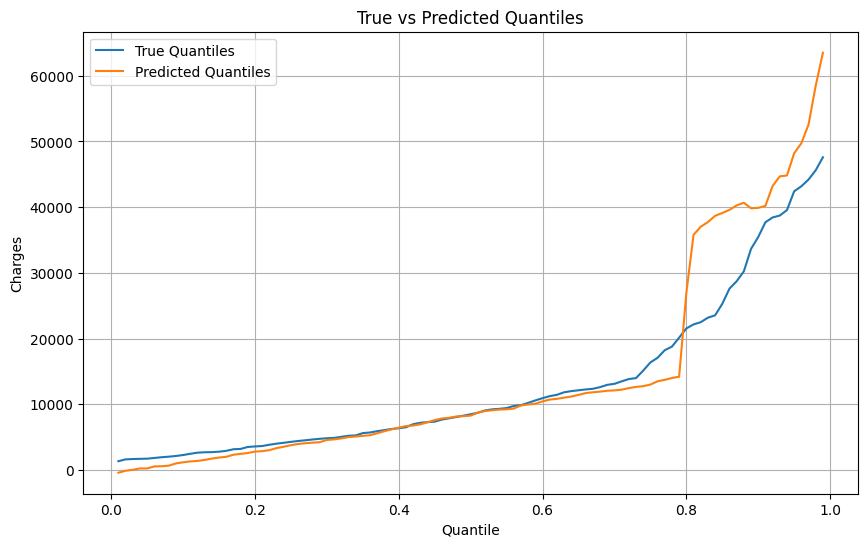

In [23]:
# Function to plot predicted quantiles against actual values
def plot_quantiles(y_test, qr_predictions, quantiles):
    plt.figure(figsize=(10, 6))
    plt.plot(quantiles, [np.percentile(y_test, q*100) for q in quantiles], label='True Quantiles')
    plt.plot(quantiles, [np.percentile(qr_predictions[f'quantile_{int(q*100)}'], q*100) for q in quantiles], label='Predicted Quantiles')
    plt.xlabel('Quantile')
    plt.ylabel('Charges')
    plt.title('True vs Predicted Quantiles')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the quantiles
plot_quantiles(y_test, qr_predictions, quantiles)

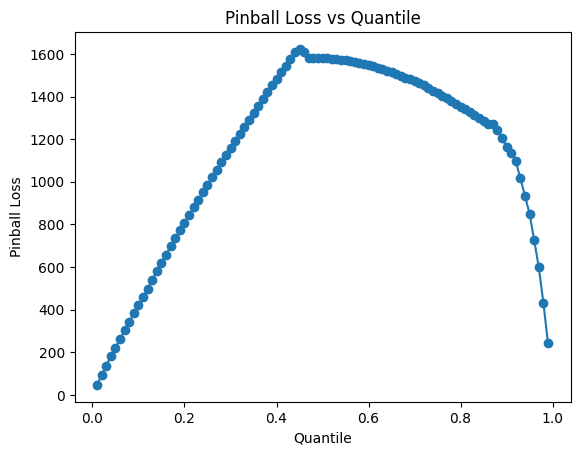

In [574]:
def plot_pinball_loss_vs_quantile(y_true, y_pred, quantiles):
    losses = []
    for i, q in enumerate(quantiles):
        losses.append(mean_pinball_loss(y_true, y_pred.loc[:, f'quantile_{int(q * 100)}'], alpha=q))
    plt.plot(quantiles, losses, marker='o')
    plt.xlabel('Quantile')
    plt.ylabel('Pinball Loss')
    plt.title('Pinball Loss vs Quantile')
    plt.show()

plot_pinball_loss_vs_quantile(y_test, qr_predictions, quantiles)


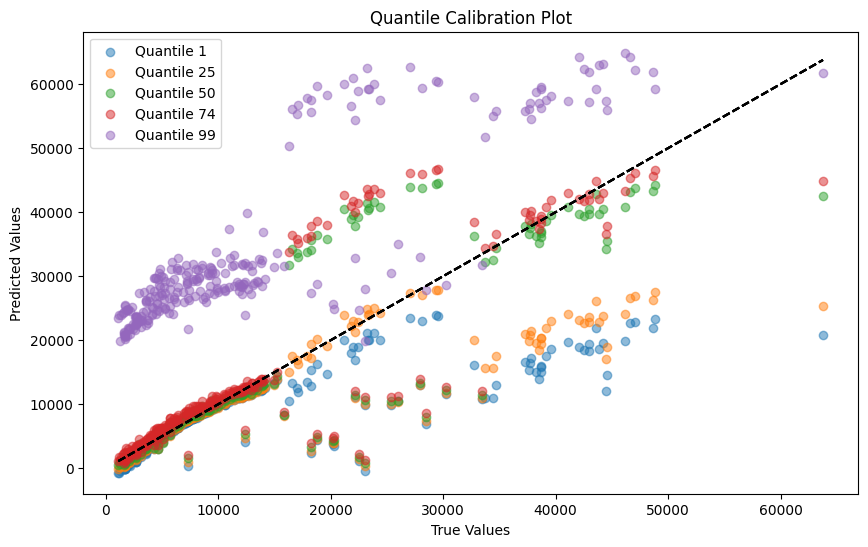

In [576]:
quantiles

def plot_quantile_calibration(y_true, y_pred, quantiles):
    plt.figure(figsize=(10, 6))
    for i, q in enumerate(quantiles):
        plt.scatter(y_true, y_pred.loc[:, f'quantile_{int(q * 100)}'], label=f'Quantile {int(q*100)}', alpha=0.5)
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='black', linestyle='--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Quantile Calibration Plot")
    plt.legend()
    plt.show()

quantiles_calib = np.linspace(0.01, 0.99, 5)

plot_quantile_calibration(y_test, qr_predictions, quantiles_calib)

In [596]:
X_test2

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast
575,58,female,27.170,0,no,northwest
535,38,male,28.025,1,no,northeast
543,54,female,47.410,0,yes,southeast


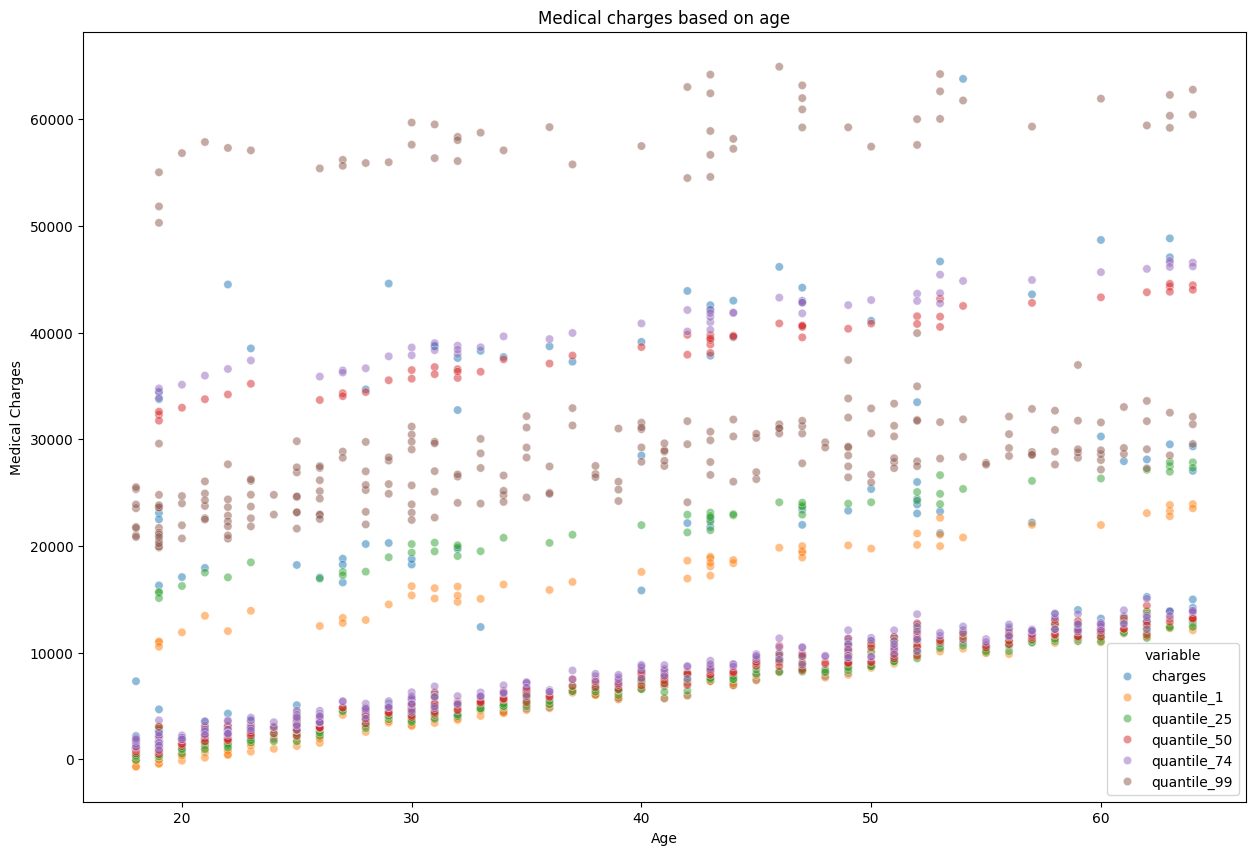

In [610]:
def plot_quantile_age(y_pred, quantiles):
    plt.figure(figsize=(15, 10))
    new_df = pd.DataFrame()
    new_df['charges'] = y_test.reset_index(drop=True)
    new_df['age'] = X_test2['age'].reset_index(drop=True)
    for i, q in enumerate(quantiles):
        new_df[f'quantile_{int(q * 100)}'] = y_pred[f'quantile_{int(q * 100)}']
    df_pred_melted = pd.melt(new_df, id_vars=['age'])
    column_names = [col for col in new_df.columns if col != 'age']
    sns.scatterplot(data=df_pred_melted, x='age', y='value', hue='variable', hue_order=column_names, alpha=0.5)
    plt.title('Medical charges based on age')
    plt.ylabel('Medical Charges')
    plt.xlabel('Age')
    plt.show()

plot_quantile_age(qr_predictions, quantiles_calib)

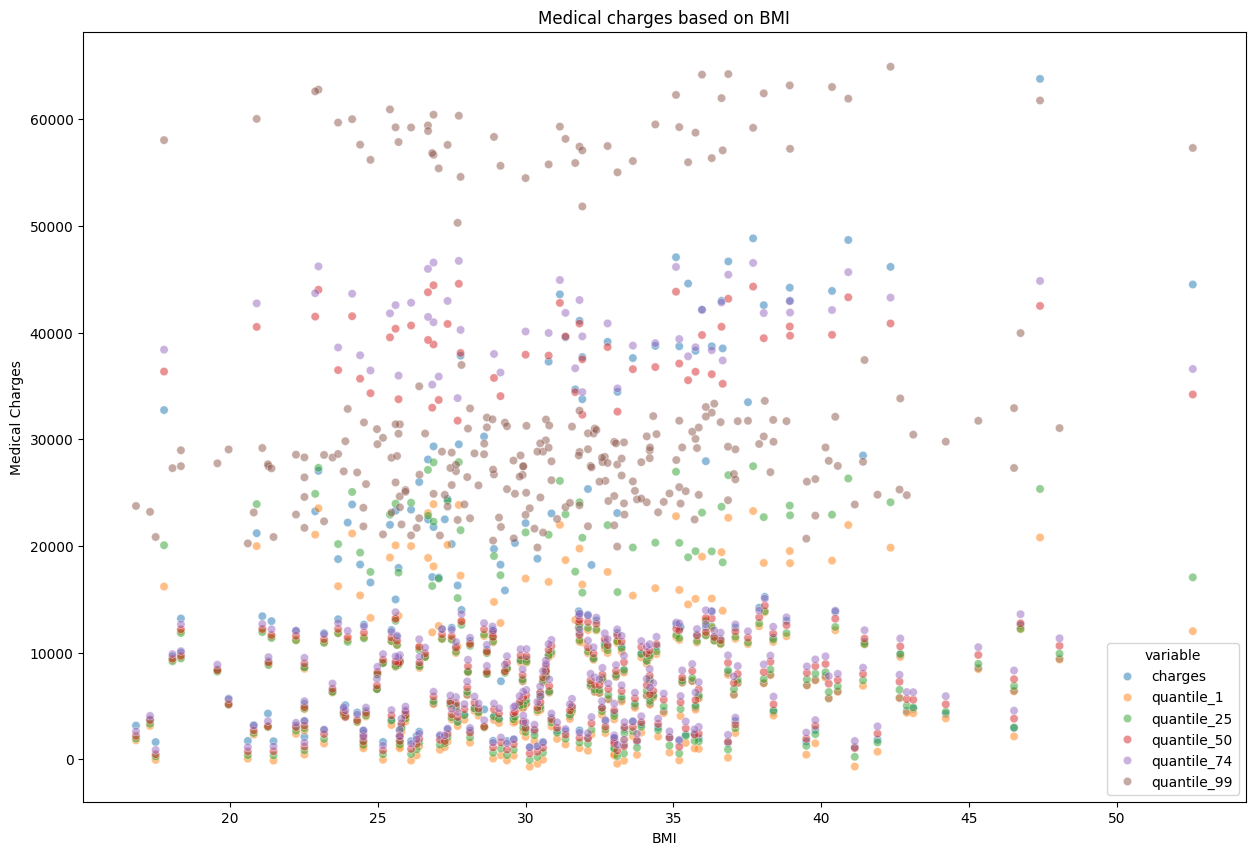

In [609]:
def plot_quantile_bmi(y_pred, quantiles):
    plt.figure(figsize=(15, 10))
    new_df = pd.DataFrame()
    new_df['charges'] = y_test.reset_index(drop=True)
    new_df['bmi'] = X_test2['bmi'].reset_index(drop=True)
    for i, q in enumerate(quantiles):
        new_df[f'quantile_{int(q * 100)}'] = y_pred[f'quantile_{int(q * 100)}']
    df_pred_melted = pd.melt(new_df, id_vars=['bmi'])
    column_names = [col for col in new_df.columns if col != 'bmi']
    sns.scatterplot(data=df_pred_melted, x='bmi', y='value', hue='variable', hue_order=column_names, alpha=0.5)
    plt.title('Medical charges based on BMI')
    plt.ylabel('Medical Charges')
    plt.xlabel('BMI')
    plt.show()

plot_quantile_bmi(qr_predictions, quantiles_calib)

In [307]:
def calculate_quantile_loss(y_true, df_predictions, quantiles):
    """
    Calculate the quantile loss for each quantile in the predictions DataFrame and return the total loss.

    Parameters:
    y_true (array-like): The true target values.
    df_predictions (pd.DataFrame): DataFrame containing predicted quantiles, with columns named "quantile_{index}".
    quantiles (sequence): A sequence of quantile values (e.g., [0.01, 0.02, ..., 0.99]).

    Returns:
    float: The sum of all quantile losses.
    """
    quantile_losses = []

    for quantile in quantiles:
        # Calculate the corresponding column name
        col_name = f'quantile_{int(quantile * 100)}'
        
        # Access the predicted values for the given quantile
        y_pred = df_predictions[col_name].values
        
        # Compute the quantile loss
        error = y_true - y_pred
        loss = np.maximum(quantile * error, (quantile - 1) * error).mean()
        
        # Store the loss in the dictionary
        quantile_losses.append(loss)

    return sum(quantile_losses)

In [309]:
quantile_loss = calculate_quantile_loss(y_test, qr_predictions, quantiles)
print(f"Quantile Loss: {quantile_loss:.4f}")

Quantile Loss: 112551.4204


In [24]:
def calculate_pinball_loss(y_test, qr_predictions, quantiles):
    losses = []
    for q in quantiles:
        loss = mean_pinball_loss(y_test, qr_predictions[f'quantile_{int(q*100)}'], alpha=q)
        losses.append(loss)
    return np.mean(losses)

# Calculate pinball loss for quantile regression predictions
mean_pinball = calculate_pinball_loss(y_test, qr_predictions, quantiles)
print(f"Mean Pinball Loss: {mean_pinball:.4f}")


Mean Pinball Loss: 1136.8830


In [25]:
def coverage_probability(y_true, lower_pred, upper_pred):
    within_bounds = np.logical_and(y_true >= lower_pred, y_true <= upper_pred)
    return np.mean(within_bounds)

# Calculate coverage probability between the 10th and 90th quantiles
lower_quantile = qr_predictions['quantile_10']
upper_quantile = qr_predictions['quantile_90']
coverage_prob = coverage_probability(y_test.reset_index(drop=True), lower_quantile, upper_quantile)

print(f"Coverage Probability (10th to 90th quantile): {coverage_prob * 100:.2f}%")

Coverage Probability (10th to 90th quantile): 80.97%


In [26]:
qr_predictions.to_csv('qr_quantile_predictions.csv', index=False)

## Quantile Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [562]:
rf = RandomForestRegressor(n_estimators=120, random_state=13)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=13)

In [570]:
def quantile_prediction(rf_model, X, quantiles):
    # Generate predictions for each individual tree in the random forest
    all_tree_predictions = [tree.predict(X) for tree in rf_model.estimators_]

    # Stack the predictions from all trees
    all_tree_predictions = np.stack(all_tree_predictions, axis=1)

    # Calculate the desired quantiles
    quantile_predictions = {}
    for q in quantiles:
        quantile_predictions[f'quantile_{int(round(q*100))}'] = np.percentile(all_tree_predictions, q*100, axis=1)

    # Convert to DataFrame
    return pd.DataFrame(quantile_predictions)

# Get quantile predictions on the test set
qrf_predictions = quantile_prediction(rf, X_test, quantiles)

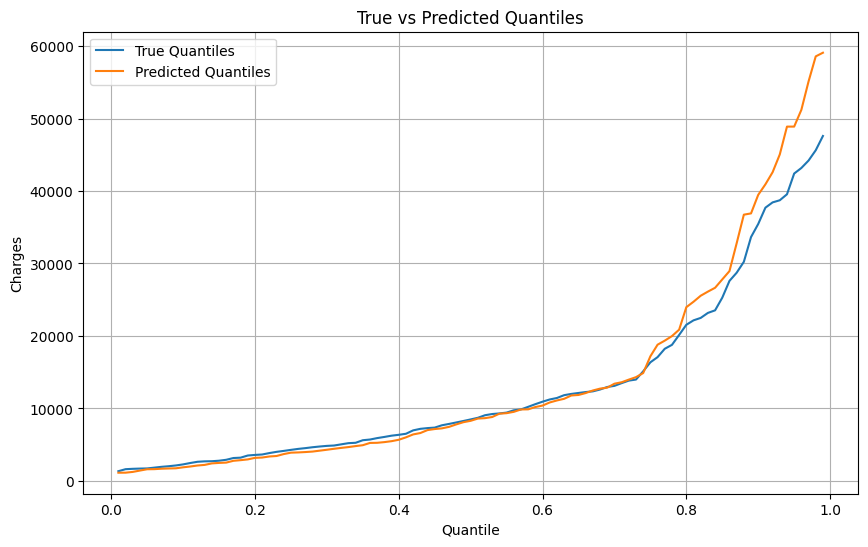

In [564]:
plot_quantiles(y_test, qrf_predictions, quantiles)

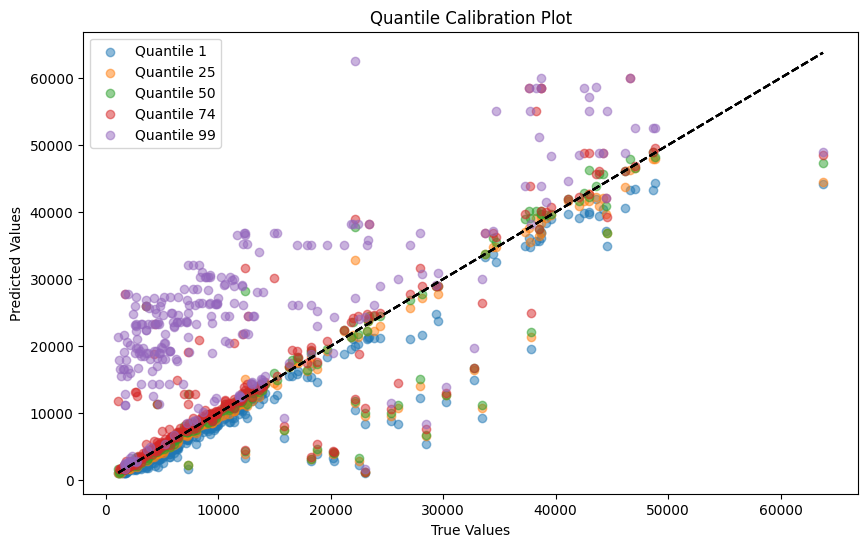

In [577]:
plot_quantile_calibration(y_test, qrf_predictions, quantiles_calib)

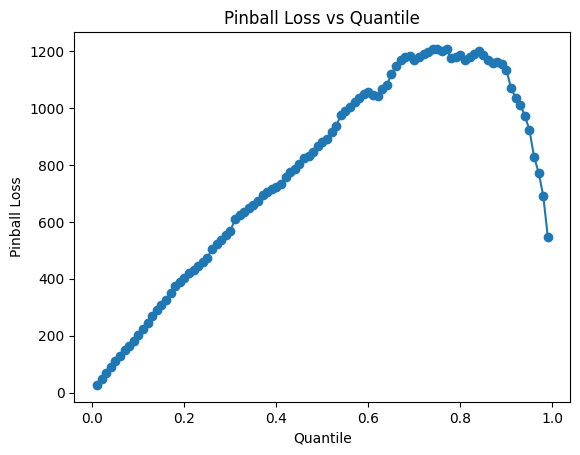

In [579]:
plot_pinball_loss_vs_quantile(y_test, qrf_predictions, quantiles)

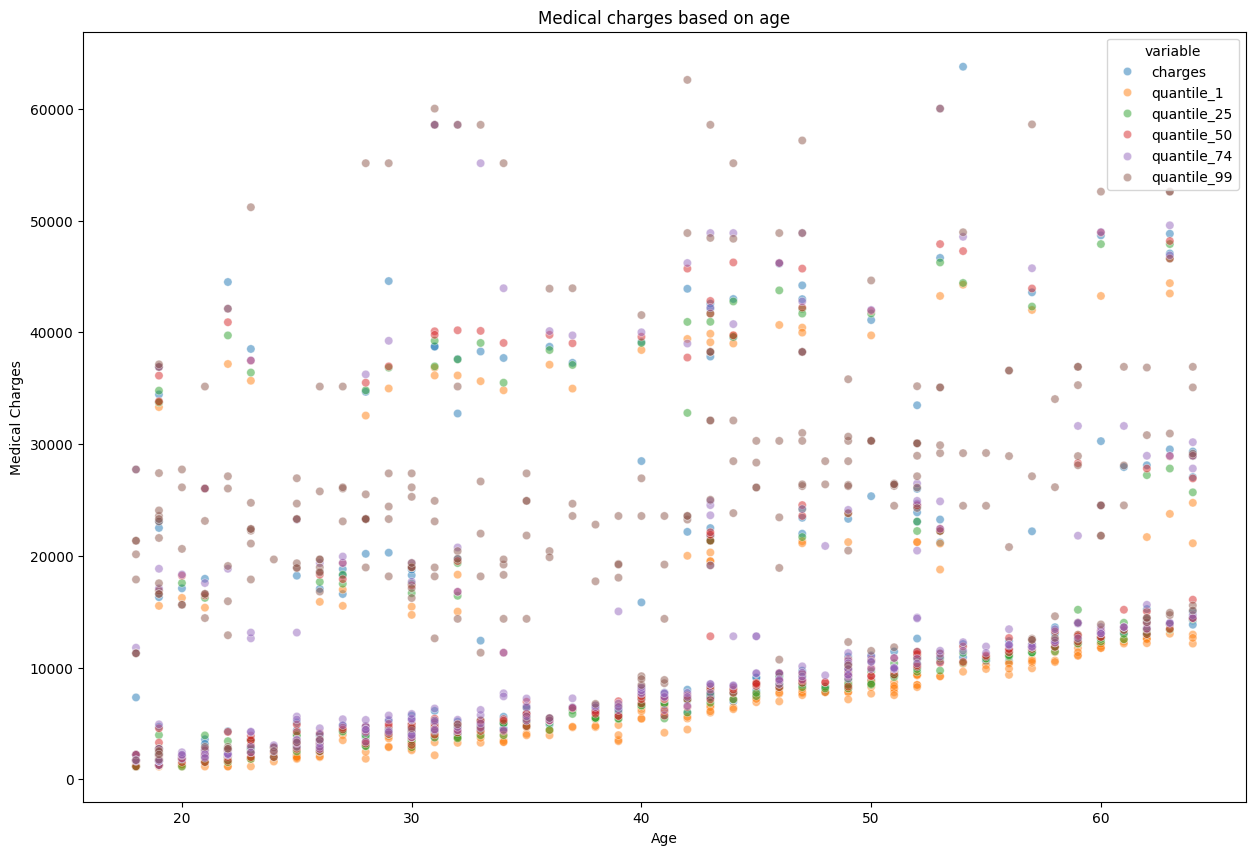

In [617]:
plot_quantile_age(qrf_predictions, quantiles_calib)

In [310]:
quantile_loss = calculate_quantile_loss(y_test, qrf_predictions, quantiles)
print(f"Quantile Loss: {quantile_loss:.4f}")

Quantile Loss: 76640.8185


In [31]:
mean_pinball_rf = calculate_pinball_loss(y_test, qrf_predictions, quantiles)
print(f"Mean Pinball Loss: {mean_pinball_rf:.4f}")

Mean Pinball Loss: 774.1497


In [32]:
lower_quantile_rf = qrf_predictions['quantile_10']
upper_quantile_rf = qrf_predictions['quantile_90']
coverage_prob_rf = coverage_probability(y_test.reset_index(drop=True), lower_quantile_rf, upper_quantile_rf)

print(f"Coverage Probability (10th to 90th quantile): {coverage_prob_rf * 100:.2f}%")

Coverage Probability (10th to 90th quantile): 85.07%


In [33]:
qrf_predictions.to_csv('qrf_quantile_predictions.csv', index=False)

## GBM for quantile regression

In [34]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from lightgbm import LGBMRegressor

In [36]:
gbm_models = {}

# Train a model for each quantile
for q in quantiles:
    gbm = LGBMRegressor(objective='quantile', alpha=q, n_estimators=100, random_state=42)
    gbm.fit(X_train, y_train)
    gbm_models[f'quantile_{int(q*100)}'] = gbm

gbm_predictions = {}

for q in quantiles:
    model = gbm_models[f'quantile_{int(q*100)}']
    gbm_predictions[f'quantile_{int(q*100)}'] = model.predict(X_test)

gbm_predictions_df = pd.DataFrame(gbm_predictions)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 1249.433838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

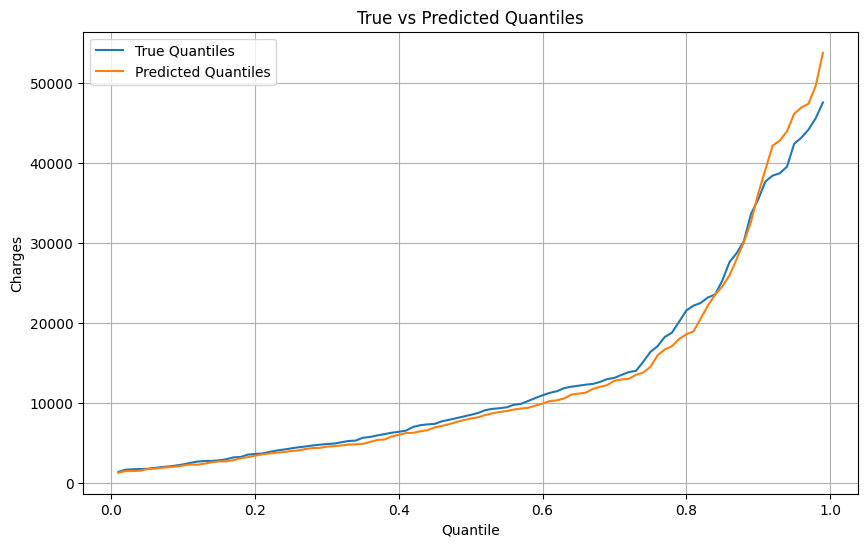

In [37]:
plot_quantiles(y_test, gbm_predictions_df, quantiles)

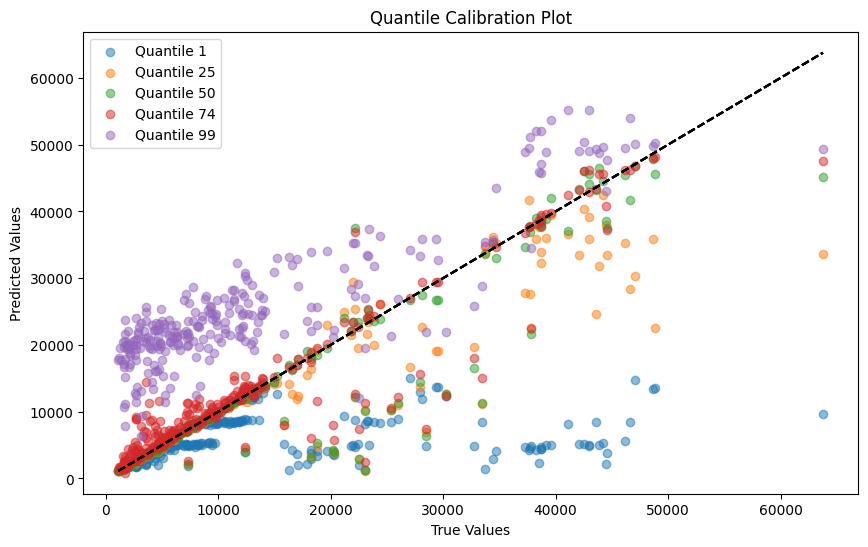

In [578]:
plot_quantile_calibration(y_test, gbm_predictions_df, quantiles_calib)

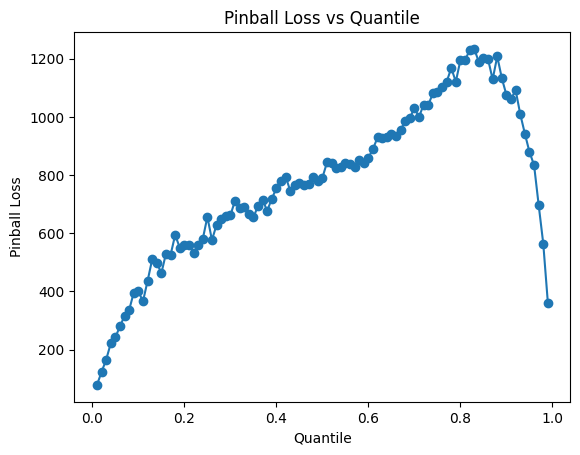

In [580]:
plot_pinball_loss_vs_quantile(y_test, gbm_predictions_df, quantiles)

In [311]:
quantile_loss = calculate_quantile_loss(y_test, gbm_predictions_df, quantiles)
print(f"Quantile Loss: {quantile_loss:.4f}")

Quantile Loss: 76486.7431


In [254]:
mean_pinball_gbm = calculate_pinball_loss(y_test, gbm_predictions_df, quantiles)
print(f"Mean Pinball Loss: {mean_pinball_gbm:.4f}")

Mean Pinball Loss: 772.5934


In [39]:
lower_quantile_gbm = gbm_predictions_df['quantile_10']
upper_quantile_gbm = gbm_predictions_df['quantile_90']
coverage_prob_gbm = coverage_probability(y_test.reset_index(drop=True), lower_quantile_gbm, upper_quantile_gbm)

print(f"Coverage Probability (10th to 90th quantile): {coverage_prob_gbm * 100:.2f}%")

Coverage Probability (10th to 90th quantile): 66.79%


In [40]:
gbm_predictions_df.to_csv('gbm_quantile_predictions.csv', index=False)

## Deep learning for quantile regression

### Single model for each quantile

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

In [335]:
def quantile_loss(quantile):
    def loss(y_true, y_pred):
        error = y_true - y_pred
        return tf.reduce_mean(tf.maximum(quantile * error, (quantile - 1) * error))
    return loss

In [336]:
def build_quantile_model(shape, quantile):
    model = models.Sequential()
    
    # Input Layer
    model.add(layers.InputLayer(shape=shape))
    
    # Hidden Layers
    model.add(layers.Dense(256, activation='leaky_relu'))
    model.add(layers.Dense(256, activation='leaky_relu'))
    model.add(layers.Dropout(0.1))  # Adding Dropout for regularization
    model.add(layers.Dense(128, activation='leaky_relu'))
    model.add(layers.Dense(128, activation='leaky_relu'))
    model.add(layers.Dropout(0.1))  # Adding Dropout for regularization
    model.add(layers.Dense(64, activation='leaky_relu'))
    model.add(layers.Dense(64, activation='leaky_relu'))
    
    # Output Layer
    model.add(layers.Dense(1, activation='linear'))  # Linear output for regression
    
    # Compile the model with the quantile loss function
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss=quantile_loss(quantile))
    
    return model

In [337]:
# Define the quantiles
quantiles = np.linspace(0.01, 0.99, 99)

# Dictionary to store models and their predictions
models_quantiles = {}
predictions_quantiles = {}

# Train a model for each quantile
for quantile in quantiles:
    print(f"Training model for quantile: {quantile}")
    
    # Build the model
    model = build_quantile_model(shape=(X_train.shape[1],), quantile=quantile)
    
    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
    
    # Store the trained model
    models_quantiles[f'quantile_{int(quantile*100)}'] = model
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions_quantiles[f'quantile_{int(quantile*100)}'] = predictions


Training model for quantile: 0.01
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Training model for quantile: 0.02
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training model for quantile: 0.03
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model for quantile: 0.04
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model for quantile: 0.05
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training model for quantile: 0.060000000000000005
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training model for quantile: 0.06999999999999999
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Training model for quantile: 0.08
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model for quantile: 0.09
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training model for quantile: 0.09999999999999999
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model for quantile: 0.11
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training model for quantile: 0.12
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training model for quantile: 0.13
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training model for quant

In [338]:
predictions_quantiles_t = predictions_quantiles
predictions_quantiles_t = {k: v.flatten() for k, v in predictions_quantiles_t.items()}
predictions_quantiles_t = pd.DataFrame(predictions_quantiles_t)

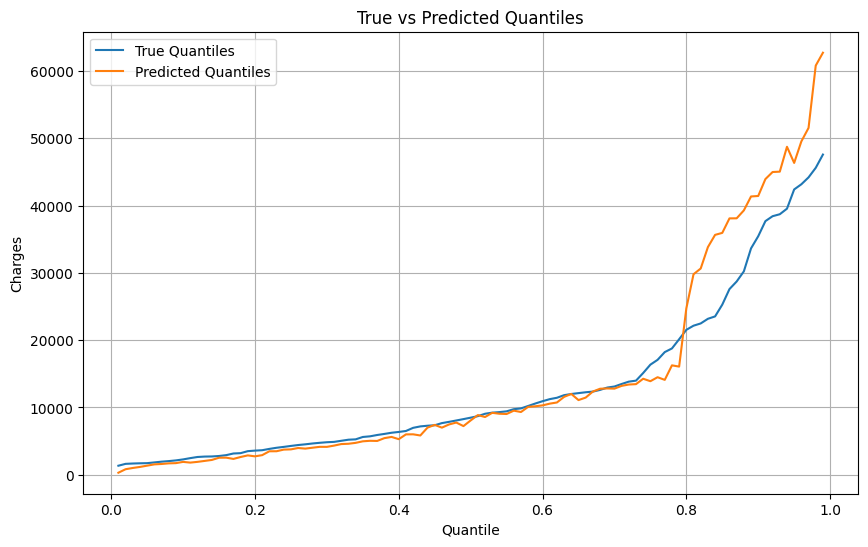

In [339]:
plot_quantiles(y_test, predictions_quantiles_t, quantiles)

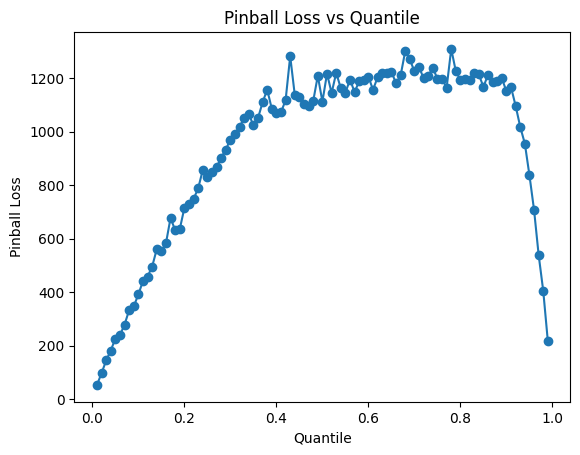

In [612]:
plot_pinball_loss_vs_quantile(y_test, predictions_quantiles_t, quantiles)

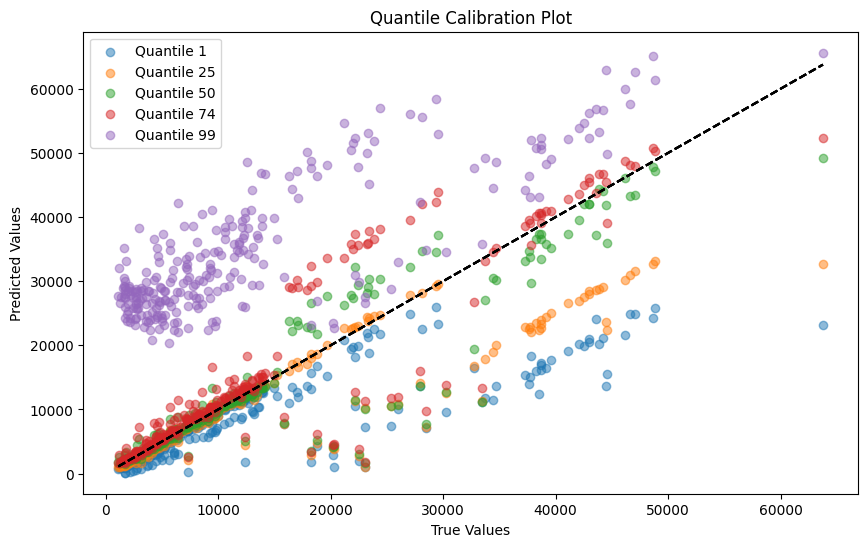

In [614]:
plot_quantile_calibration(y_test, predictions_quantiles_t, quantiles_calib)

In [340]:
quantile_loss = calculate_quantile_loss(y_test, predictions_quantiles_t, quantiles)
print(f"Quantile Loss: {quantile_loss:.4f}")

Quantile Loss: 93553.4007


In [341]:
mean_pinball_sdl = calculate_pinball_loss(y_test, predictions_quantiles_t, quantiles)
print(f"Mean Pinball Loss: {mean_pinball_sdl:.4f}")

Mean Pinball Loss: 944.9838


In [342]:
lower_quantile_sdl = predictions_quantiles_t['quantile_10']
upper_quantile_sdl = predictions_quantiles_t['quantile_90']
coverage_prob_sdl = coverage_probability(y_test.reset_index(drop=True), lower_quantile_sdl, upper_quantile_sdl)

print(f"Coverage Probability (10th to 90th quantile): {coverage_prob_sdl * 100:.2f}%")

Coverage Probability (10th to 90th quantile): 91.04%


In [343]:
predictions_quantiles_t.to_csv('sdl_quantile_predictions.csv', index=False)

### Unique model for every quantile

In [492]:
def multi_quantile_loss(quantiles):
    def loss(y_true, y_pred):
        losses = []
        for i, q in enumerate(quantiles):
            error = y_true - y_pred[:,i]
            losses.append(tf.reduce_mean(tf.maximum(q * error, (q - 1) * error)))
        return tf.reduce_sum(losses)
    return loss

In [374]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [493]:
def build_multi_quantile_model(input_shape, quantiles):
    model = models.Sequential()

    model.add(layers.InputLayer(input_shape=input_shape))

    model.add(layers.Dense(256, activation='leaky_relu'))
    model.add(layers.Dense(256, activation='leaky_relu'))
    model.add(layers.Dropout(0.1))  # Adding Dropout for regularization
    model.add(layers.Dense(128, activation='leaky_relu'))
    model.add(layers.Dense(128, activation='leaky_relu'))
    model.add(layers.Dropout(0.1)) 
    
    # Output Layer
    model.add(layers.Dense(len(quantiles)))

    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss=multi_quantile_loss(quantiles))

    return model

In [494]:
# Build the multi-output quantile model
multi_quantile_model = build_multi_quantile_model(input_shape=(X_train.shape[1],), quantiles=quantiles)

# Train the model
multi_quantile_model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

c:\Users\plodato\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - loss: 676904.6250
Epoch 2/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 647150.3750
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 386917.5000
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 348993.3438
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 310051.1250
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 308363.0938
Epoch 7/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 326375.1875
Epoch 8/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 314600.8750
Epoch 9/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 316927.9062
Epoch 10/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 301660.4375
Epoch 11/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 308012.1562
Epoch 12/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 311164.2188
Epoch 13/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 301541.2500
Epoch 14/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 304059.6875


In [495]:
# Predict the quantiles on the test set
y_pred_multi_quantile = multi_quantile_model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [496]:
y_pred_multi_quantile_df  = pd.DataFrame(y_pred_multi_quantile)
def rename_numeric_columns(col):
    return col + 1
y_pred_multi_quantile_df = y_pred_multi_quantile_df.rename(columns=rename_numeric_columns)
y_pred_multi_quantile_df = y_pred_multi_quantile_df.rename(columns=lambda x: f'quantile_{x}')
y_pred_multi_quantile_df

,quantile_1,quantile_2,quantile_3,quantile_4,quantile_5,quantile_6,quantile_7,quantile_8,quantile_9,quantile_10,...,quantile_90,quantile_91,quantile_92,quantile_93,quantile_94,quantile_95,quantile_96,quantile_97,quantile_98,quantile_99
0,954.033936,1129.790649,1266.292480,1419.555664,1453.735596,1644.185059,1699.389160,1858.540039,1953.939453,2062.061768,...,30543.513672,32096.373047,33520.835938,34943.636719,36215.828125,37656.632812,39175.437500,40714.933594,42765.386719,45754.523438
1,1001.715210,1186.979980,1330.119019,1490.846313,1527.663330,1726.965088,1784.922119,1952.488281,2053.009277,2165.964111,...,32087.027344,33717.972656,35214.671875,36709.546875,38046.667969,39559.300781,41154.460938,42772.062500,44926.566406,48066.433594
2,1268.788574,1503.617554,1684.784180,1888.041748,1935.022217,2187.634521,2261.206787,2472.826172,2600.096436,2743.640381,...,40641.062500,42707.164062,44602.562500,46495.628906,48189.039062,50105.546875,52125.945312,54174.261719,56903.722656,60880.566406
3,1089.870117,1290.595459,1446.517090,1621.747559,1660.571167,1878.290283,1941.170410,2123.184814,2231.754395,2355.489502,...,34891.691406,36665.648438,38292.726562,39918.046875,41371.164062,43017.382812,44752.433594,46510.847656,48853.316406,52267.917969
4,1180.608643,1399.036499,1567.733276,1757.412720,1800.437134,2035.233521,2103.449463,2301.364990,2419.893555,2552.641357,...,37819.035156,39741.125000,41505.175781,43267.367188,44843.445312,46625.855469,48506.152344,50413.148438,52952.199219,56652.773438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1280.954224,1518.562744,1701.083130,1906.422485,1953.956055,2208.878418,2282.963867,2496.902100,2625.299561,2770.329834,...,41037.503906,43123.410156,45037.406250,46948.812500,48658.949219,50593.855469,52633.738281,54702.121094,57458.722656,61474.066406
264,1127.924072,1336.572388,1497.703979,1678.453857,1720.125610,1944.712769,2010.141479,2198.250000,2311.394775,2439.020996,...,36128.585938,37965.265625,39650.250000,41333.171875,42838.523438,44542.328125,46338.312500,48159.238281,50585.457031,54120.855469
265,937.651062,1110.805420,1244.865356,1395.550049,1429.312866,1616.226074,1670.572388,1827.060059,1921.105713,2027.184448,...,30028.136719,31554.533203,32955.070312,34353.941406,35605.031250,37021.093750,38514.035156,40027.808594,42043.707031,44982.160156
266,1343.285645,1592.979004,1783.754761,1999.305786,2049.503418,2316.689697,2393.759033,2619.150146,2753.415527,2905.095947,...,43040.656250,45228.054688,47235.347656,49240.363281,51034.066406,53062.460938,55202.062500,57371.394531,60263.390625,64474.503906


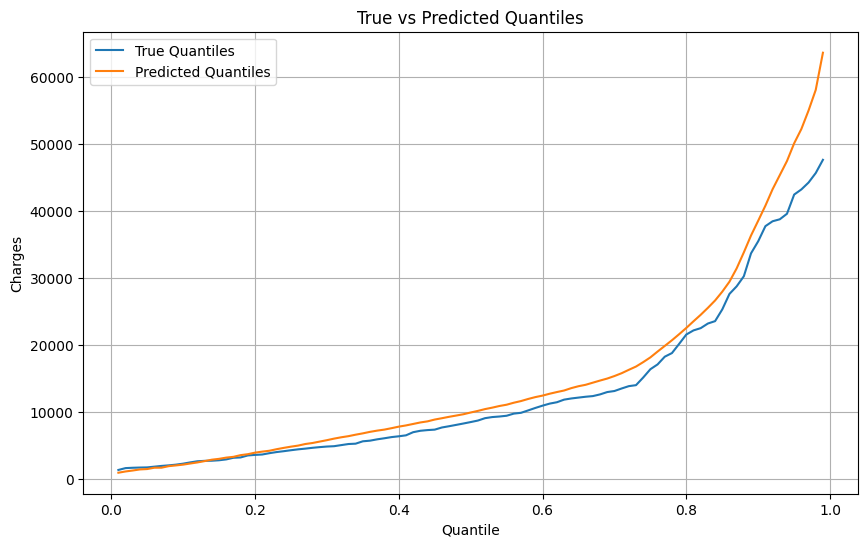

In [497]:
plot_quantiles(y_test, y_pred_multi_quantile_df, quantiles)

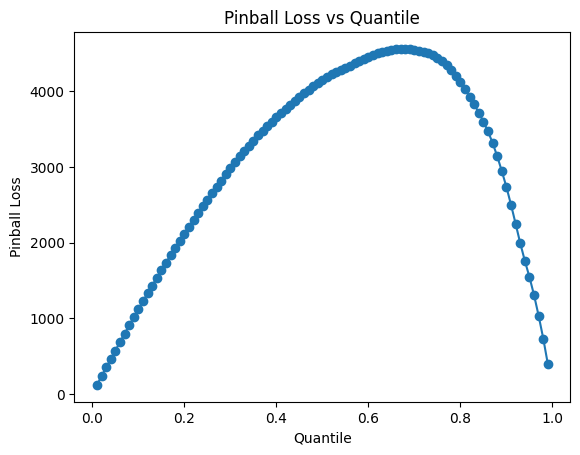

In [613]:
plot_pinball_loss_vs_quantile(y_test, y_pred_multi_quantile_df, quantiles)

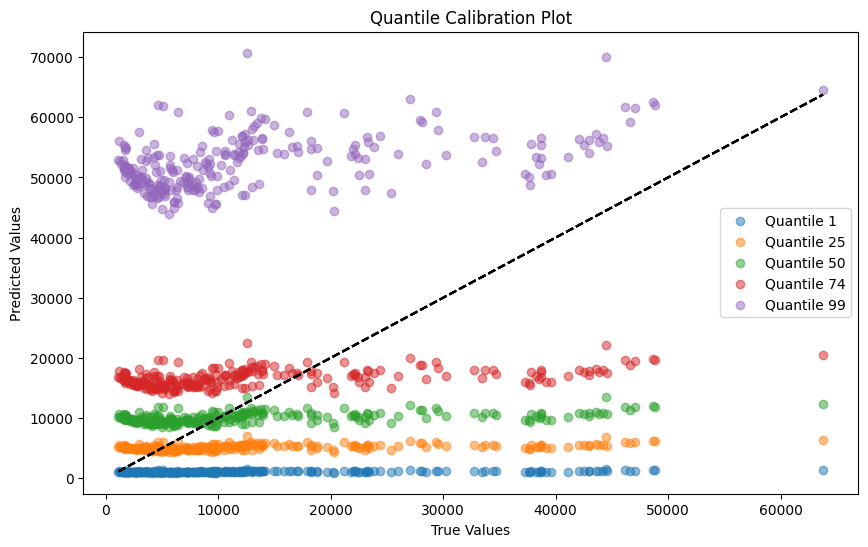

In [616]:
plot_quantile_calibration(y_test, y_pred_multi_quantile_df, quantiles_calib)

In [470]:
quantile_loss = calculate_quantile_loss(y_test, y_pred_multi_quantile_df, quantiles)
print(f"Quantile Loss: {quantile_loss:.4f}")

Quantile Loss: 313349.8315


In [471]:
mean_pinball_dl = calculate_pinball_loss(y_test, y_pred_multi_quantile_df, quantiles)
print(f"Mean Pinball Loss: {mean_pinball_dl:.4f}")

Mean Pinball Loss: 3165.1498


In [423]:
lower_quantile_dl = y_pred_multi_quantile_df['quantile_10']
upper_quantile_dl = y_pred_multi_quantile_df['quantile_90']
coverage_prob_dl = coverage_probability(y_test.reset_index(drop=True), lower_quantile_dl, upper_quantile_dl)

print(f"Coverage Probability (10th to 90th quantile): {coverage_prob_dl * 100:.2f}%")

Coverage Probability (10th to 90th quantile): 80.60%


In [252]:
y_pred_multi_quantile_df.to_csv('dl_quantile_predictions.csv', index=False)

### Exploring best performing model: Quantile random forest

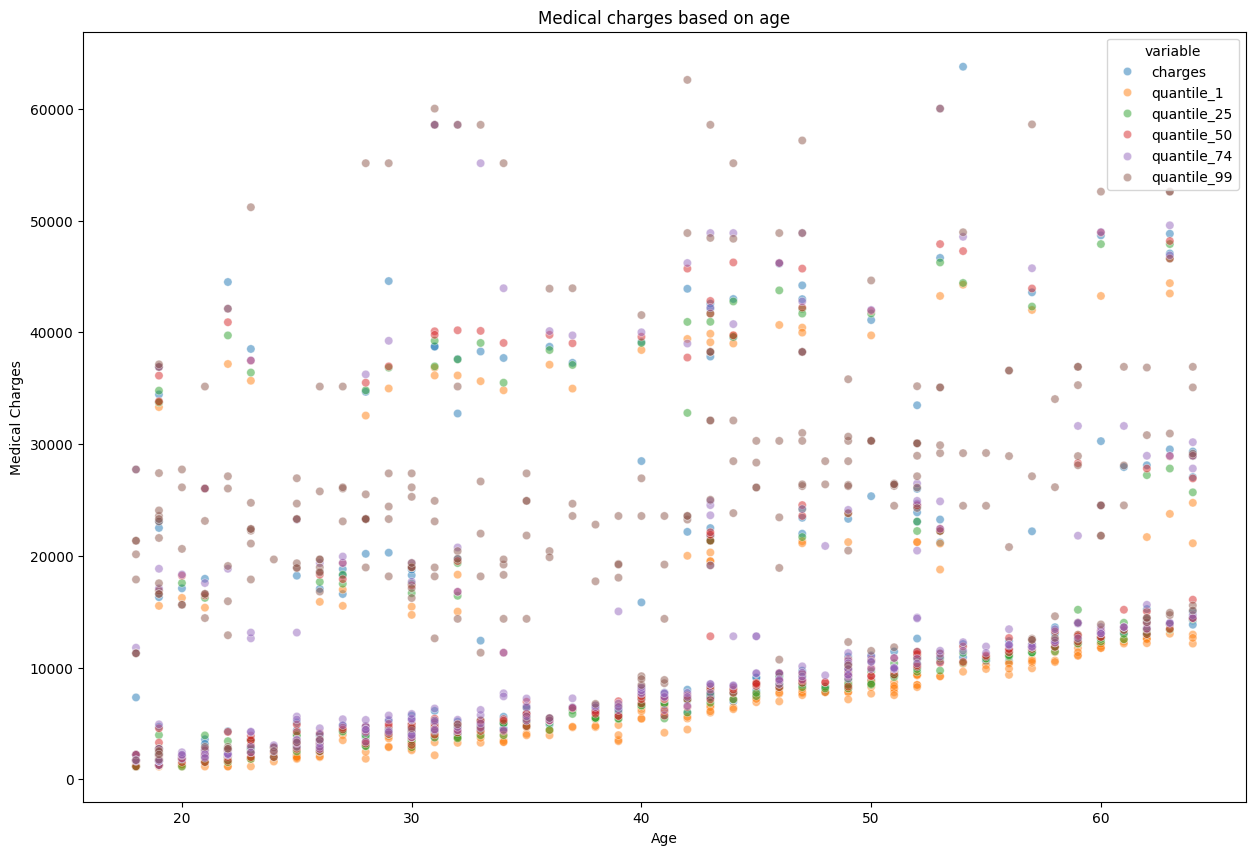

In [636]:
plot_quantile_age(qrf_predictions, quantiles_calib)

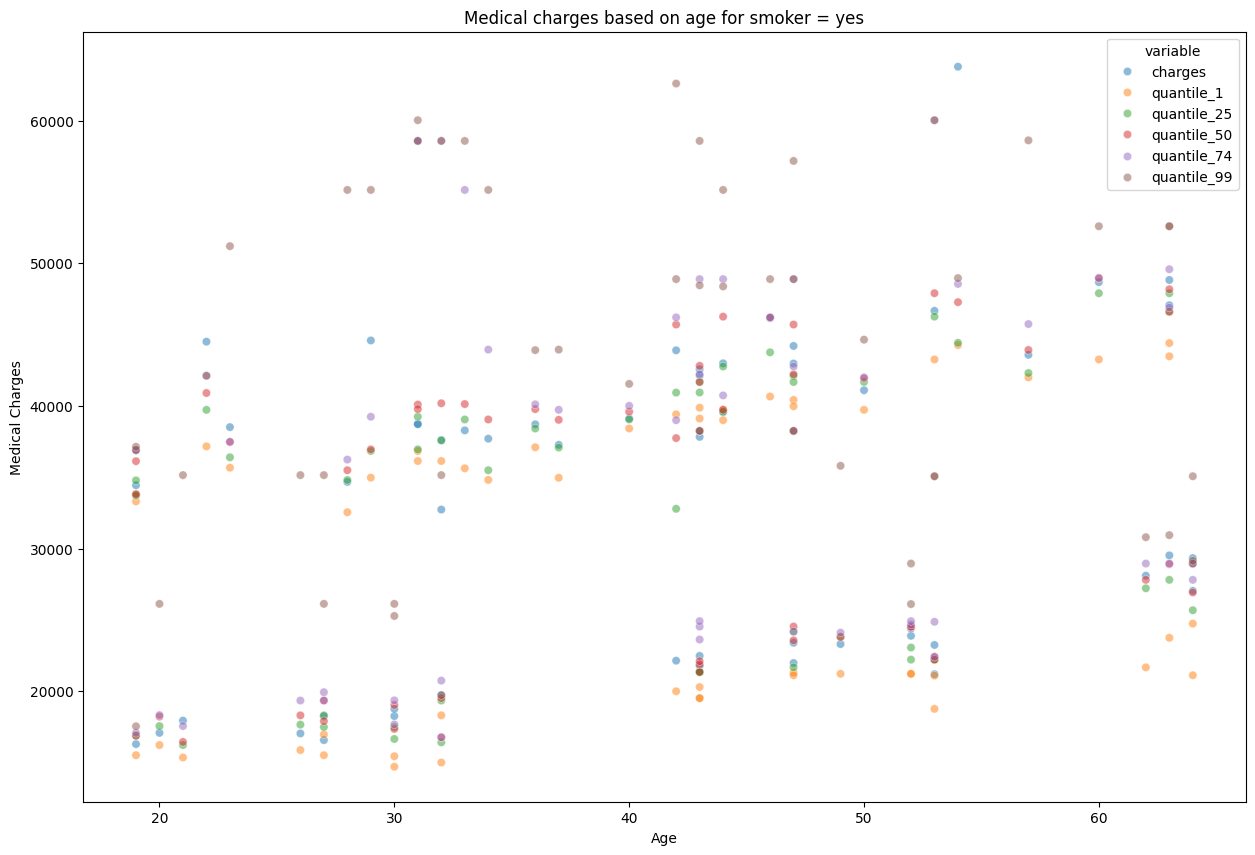

In [634]:
def plot_quantile_age_smoker(y_pred, quantiles, smoker):
    plt.figure(figsize=(15, 10))
    new_df = pd.DataFrame()
    x_test_prov = X_test2.reset_index(drop=True)
    filtered_indices = x_test_prov[x_test_prov['smoker'] == smoker].index
    new_df['charges'] = y_test.reset_index(drop=True).loc[filtered_indices]
    new_df['age'] = X_test2['age'].reset_index(drop=True).loc[filtered_indices]
    for i, q in enumerate(quantiles):
        new_df[f'quantile_{int(q * 100)}'] = y_pred.loc[filtered_indices][f'quantile_{int(q * 100)}']
    df_pred_melted = pd.melt(new_df, id_vars=['age'])
    column_names = [col for col in new_df.columns if col != 'age']
    sns.scatterplot(data=df_pred_melted, x='age', y='value', hue='variable', hue_order=column_names, alpha=0.5)
    plt.title('Medical charges based on age for smoker = ' + smoker)
    plt.ylabel('Medical Charges')
    plt.xlabel('Age')
    plt.show()

plot_quantile_age_smoker(qrf_predictions, quantiles_calib, 'yes')

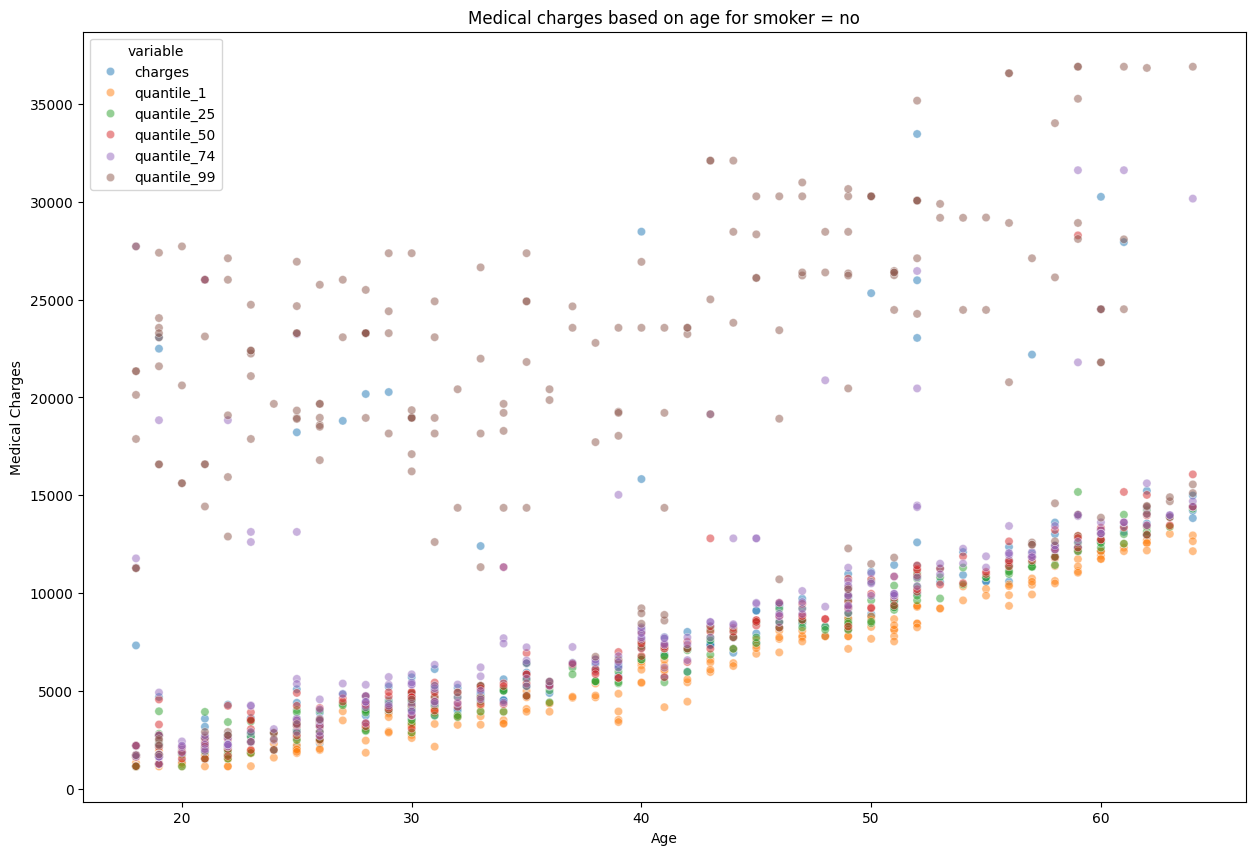

In [635]:
plot_quantile_age_smoker(qrf_predictions, quantiles_calib, 'no')

In [651]:
X_test2.head(10)

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
1312,34,male,42.900,1,no,southwest
899,19,female,22.515,0,no,northwest
752,64,male,37.905,0,no,northwest
1286,28,female,17.290,0,no,northeast
707,49,male,28.690,3,no,northwest


In [649]:
qrf_predictions['true_value'] = y_test.reset_index(drop=True)
selected_columns = ['true_value', 'quantile_25', 'quantile_50', 'quantile_75', 'quantile_99']
quantile_table = qrf_predictions[selected_columns]
quantile_table.head(10)

,true_value,quantile_25,quantile_50,quantile_75,quantile_99
0,9095.06825,8515.758700,8604.48365,9447.283363,30284.642940
1,5272.17580,5028.146600,5266.36560,5469.006600,20420.604650
2,29330.98315,28930.017875,28950.46920,28950.469200,29141.360300
3,9301.89355,9193.838500,9500.57305,9530.512463,30284.642940
4,33750.29180,33732.686700,33820.11735,36898.733080,36898.733080
5,4536.25900,5094.104775,11326.71487,11429.498363,18292.000710
6,2117.33885,1737.376000,2128.43105,2257.475250,2735.734231
7,14210.53595,14410.932100,14410.93210,14692.669350,15555.188750
8,3732.62510,2947.374400,3353.47030,4544.234800,23288.928400
9,10264.44210,9620.330700,10269.46000,10600.548300,30284.642940
